<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"> 
<hr style="border-width:2px;border-color:##75DFC1">
<center> <h1> Projet COVID </h1> </center> <br>
<center> <h2> Exploration de données</h2> </center> <br>
<hr style="border-width:2px;border-color:##75DFC1">

La première consigne du projet consiste à faire une première exploration de données (Vous pouvez récuperer le dataset [ici](https://drive.google.com/file/d/1xt7g5LkZuX09e1a8rK9sRXIrGFN6rjzl/view)). Comme vous travaillez avec des images, j'ai besoin que dans un notebook Jupyter vous implémentiez et repondiez aux questions suivantes :
<hr style="border-width:2px;border-color:##75DFC1">

>Télecharger et extraire le dataset directement depuis le notebook (vous pouvez chercher sur internet comment faire avec soit des packages dédiés ou soit en utilisant l'API de kaggle ou github) 

>Visualiser des images des différentes classes. Est-ce que vous arrivez à l'oeil nu à voir des différences?
Combien d'images y a-t-il? Quelle est la distribution d'images par classe?

>Est-ce que les images ont toutes la même taille/même résolution? Si non, quelle solution proposez-vous pour y rémédier ? 

>Est-ce que les images ont le même spectre de couleur? Est-ce que les images ont toutes la même luminosité ? Faudra-t-il normaliser tout ça?

In [ ]:
# Il faut installer la librairie kaggle si elle ne l'est pas déjà
# ! pip install kaggle

In [1]:
# Commençons par télécharger les données

import kaggle

# Pour utiliser l'API kaggle, il faut télécharger le token kaggle.json depuis son compte kaggle 
# et le placer dans /home/user/.kaggle/

kaggle.api.authenticate()

kaggle.api.dataset_download_files('tawsifurrahman/covid19-radiography-database', 
                                  unzip=True)

>Visualiser des images des différentes classes. Est-ce que vous arrivez à l'oeil nu à voir des différences?
Combien d'images y a-t-il? Quelle est la distribution d'images par classe?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
os.chdir('COVID-19 Radiography Database')

In [2]:
# Récupérons les noms des images des différentes catégories

img_covid = glob.glob('COVID/*.png')
img_normal = glob.glob('NORMAL/*.png')
img_pneumo= glob.glob('Viral Pneumonia/*.png')
#print(img_pneumo)

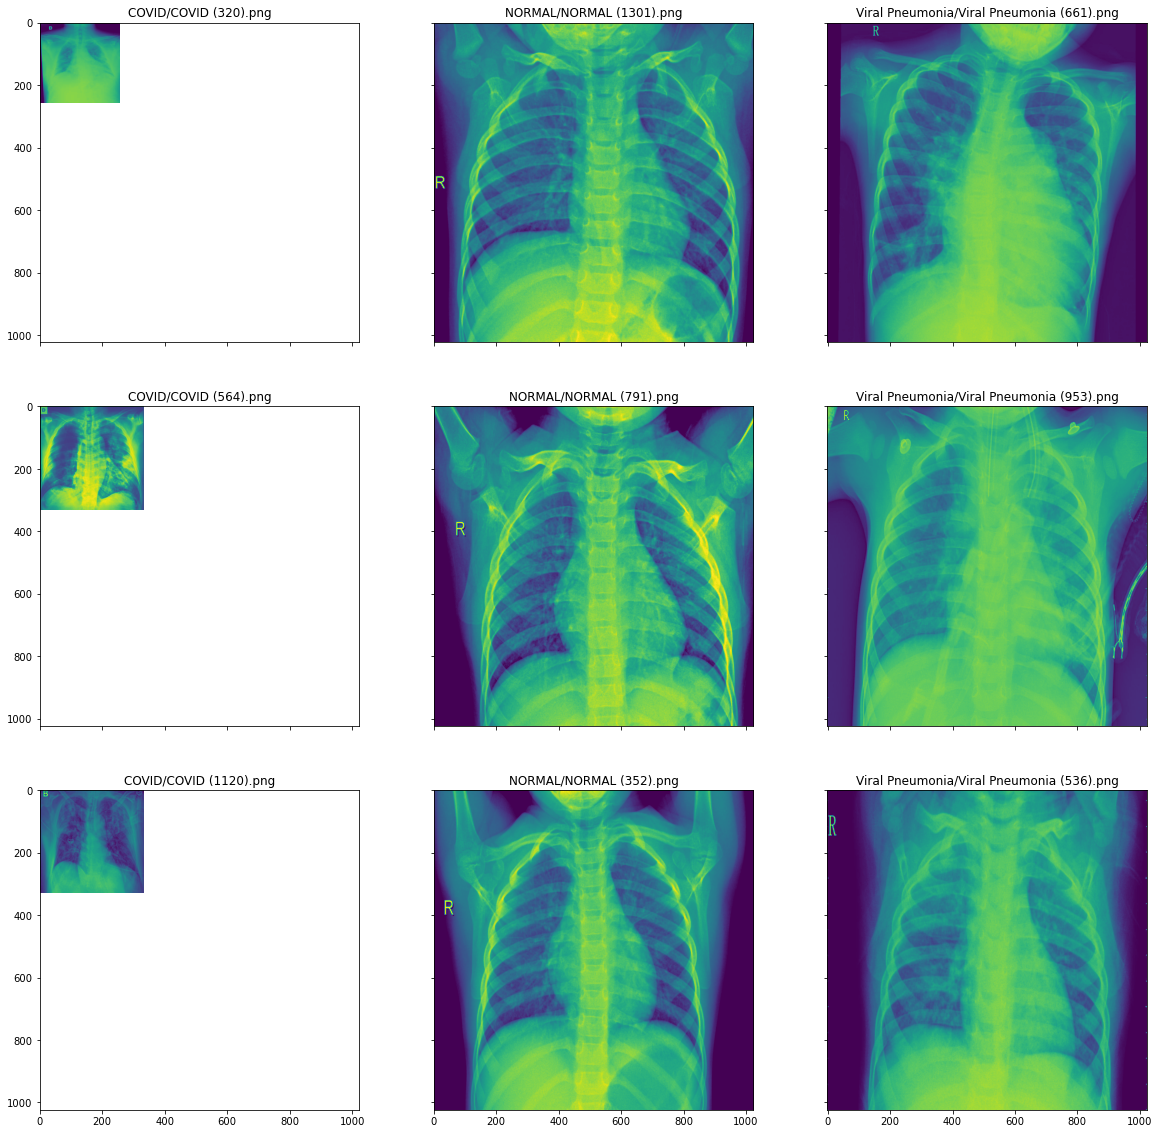

In [3]:
# Affichons quelques images

from random import choice

fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharex = True, sharey = True)

for i in range(len(axes)):
    for j, imgs in enumerate((img_covid, img_normal, img_pneumo)):
        image_name = choice(imgs)
        axes[i, j].set_title(image_name)
        scan = plt.imread(image_name)
        axes[i, j].imshow(scan);
        

In [4]:
# On constate que certaines images covid sont annotées
# Les images covid semblent avoir une résolution inférieure aux autres classes


Il y a 3886 images en tout


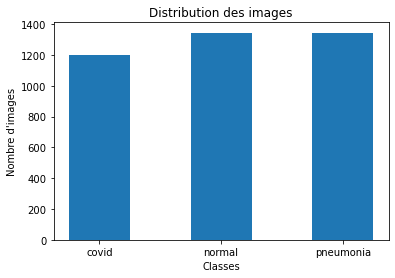

In [5]:
print("Il y a {} images en tout".format(len(img_covid) + len(img_normal) + len(img_pneumo)))

ind = range(3)
plt.bar(ind, [len(img_covid), len(img_normal), len(img_pneumo)], width = 0.5)
plt.xlabel('Classes')
plt.title('Distribution des images')
plt.xticks(ind, ('covid', 'normal', 'pneumonia'))
plt.ylabel("Nombre d'images");

>Est-ce que les images ont toutes la même taille/même résolution? Si non, quelle solution proposez-vous pour y rémédier ? 

In [6]:
# Créons un dataframe pour la suite

import pandas as pd

df = pd.DataFrame({'path' : img_covid + img_normal + img_pneumo})


In [7]:
# Ajoutons la classe de l'image à df

df['Class'] = np.select([df['path'].isin(img_covid),
                         df['path'].isin(img_normal),
                         df['path'].isin(img_pneumo)],
                         ['covid', 'normal', 'pneumo'])
df.head()

,path,Class
0,COVID/COVID (934).png,covid
1,COVID/COVID (296).png,covid
2,COVID/COVID (74).png,covid
3,COVID/COVID (261).png,covid
4,COVID/COVID (978).png,covid


In [8]:
# ! pip install opencv-python

In [9]:
# Ajoutons la taille de l'image

import cv2

for i, path in df.path.items():
    im = cv2.imread(path)
    h, w, c = im.shape # h: height, w: width, c: channel
    df.loc[i, 'height'] = h
    df.loc[i, 'width'] = w
    df.loc[i, 'channel'] = c
df.head()

,path,Class,height,width,channel
0,COVID/COVID (934).png,covid,331.0,331.0,3.0
1,COVID/COVID (296).png,covid,256.0,256.0,3.0
2,COVID/COVID (74).png,covid,256.0,256.0,3.0
3,COVID/COVID (261).png,covid,256.0,256.0,3.0
4,COVID/COVID (978).png,covid,331.0,331.0,3.0


In [10]:
# Les images ont toutes 3 channels
print(df[['height', 'width']].value_counts())

height  width 
1024.0  1024.0    2686
331.0   331.0      573
256.0   256.0      558
891.0   1084.0      31
952.0   1184.0       9
992.0   1192.0       6
1047.0  1275.0       6
1053.0  1053.0       4
917.0   1116.0       4
852.0   1039.0       1
197.0   253.0        1
723.0   594.0        1
913.0   1102.0       1
875.0   1108.0       1
913.0   1108.0       1
928.0   1130.0       1
947.0   1192.0       1
160.0   187.0        1
dtype: int64


In [11]:
# les images n'ont pas toute la même résolution et certaines ne sont pas carrées

df[(df['height'] != df['width']) & (df['Class'] == 'covid')]

,path,Class,height,width,channel
56,COVID/COVID (1193).png,covid,891.0,1084.0,3.0
70,COVID/COVID (1195).png,covid,891.0,1084.0,3.0
85,COVID/COVID (1181).png,covid,1047.0,1275.0,3.0
119,COVID/COVID (1157).png,covid,913.0,1102.0,3.0
139,COVID/COVID (1150).png,covid,952.0,1184.0,3.0
...,...,...,...,...,...
1090,COVID/COVID (1169).png,covid,891.0,1084.0,3.0
1094,COVID/COVID (1179).png,covid,891.0,1084.0,3.0
1110,COVID/COVID (1156).png,covid,917.0,1116.0,3.0
1119,COVID/COVID (1153).png,covid,952.0,1184.0,3.0


In [12]:
# Il y a 65 images qui ne sont pas carrées, et ce sont toutes des covid

# Nous suggérons de prendre la plus petite résolution et de fitter toutes les images


>Est-ce que les images ont le même spectre de couleur? Est-ce que les images ont toutes la même luminosité ? Faudra-t-il normaliser tout ça?

In [13]:
# Créons une nouvelle colonne qui vérifie si l'image est en noir et blanc
# ie les 3 channels sont égales

for i, path in df.path.items():
    im = cv2.imread(path)
    if np.array_equal(im[:,:,0], im[:,:,1]) and np.array_equal(im[:,:,1], im[:,:,2]):
        df.loc[i, 'B&W'] = True
    else :
        df.loc[i, 'B&W'] = False


In [14]:
df['B&W'].value_counts()

True    3886
Name: B&W, dtype: int64

In [15]:
# Les images sont toutes en noir et blanc

In [16]:
# Ajoutons une colonne pour la luminosité

for i, path in df.path.items():
    im = cv2.imread(path)
    df.loc[i, 'luminosite'] = np.mean(im[:,:,0])
df.head(20)

,path,Class,height,width,channel,B&W,luminosite
0,COVID/COVID (934).png,covid,331.0,331.0,3.0,True,106.488376
1,COVID/COVID (296).png,covid,256.0,256.0,3.0,True,119.666504
2,COVID/COVID (74).png,covid,256.0,256.0,3.0,True,153.078995
3,COVID/COVID (261).png,covid,256.0,256.0,3.0,True,186.787781
4,COVID/COVID (978).png,covid,331.0,331.0,3.0,True,159.006818
5,COVID/COVID (285).png,covid,256.0,256.0,3.0,True,146.361267
6,COVID/COVID (195).png,covid,256.0,256.0,3.0,True,152.560913
7,COVID/COVID (1092).png,covid,331.0,331.0,3.0,True,136.757094
8,COVID/COVID (869).png,covid,331.0,331.0,3.0,True,138.331550
9,COVID/COVID (1052).png,covid,331.0,331.0,3.0,True,125.188762


In [17]:
df['luminosite'].describe()

count    3886.000000
mean      129.088984
std        19.686354
min        46.618759
25%       116.178112
50%       128.238459
75%       142.177826
max       216.561127
Name: luminosite, dtype: float64

In [18]:
# Les images ont une luminosité différente

In [19]:
df.to_csv('img_metadata.csv', index = False)

In [20]:
!pwd

/home/baptiste/Téléchargements/COVID-19 Radiography Database


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import cv2

os.chdir('COVID-19 Radiography Database')

df = pd.read_csv('img_metadata.csv')

In [4]:
def dhash(image, hashSize=8):
    # convert the image to grayscale and resize the grayscale image,
    # adding a single column (width) so we can compute the horizontal
    # gradient
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    # convert the difference image to a hash and return it
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [8]:
for ii, img_path in enumerate(df['path'].tolist()):
    img = cv2.imread(img_path)
    df.loc[ii, 'hash'] = dhash(img)

In [9]:
df.head()

,path,Class,height,width,channel,B&W,luminosite,hash
0,COVID/COVID (934).png,covid,331.0,331.0,3.0,True,106.488376,7.595721e+18
1,COVID/COVID (296).png,covid,256.0,256.0,3.0,True,119.666504,1.019997e+19
2,COVID/COVID (74).png,covid,256.0,256.0,3.0,True,153.078995,7.830261e+18
3,COVID/COVID (261).png,covid,256.0,256.0,3.0,True,186.787781,5.087806e+17
4,COVID/COVID (978).png,covid,331.0,331.0,3.0,True,159.006818,2.389875e+18


In [12]:
df.groupby('hash').count()['path']

hash
3.103970e+15    2
4.247616e+15    1
1.014883e+16    1
1.324367e+16    1
2.225116e+16    1
Name: path, dtype: int64

In [14]:
df.groupby('hash').count()['path'].head().index

Float64Index([    3103969868852992.0,     4247616038325504.0,
              1.0148828645313052e+16, 1.3243674688047616e+16,
              2.2251157376799744e+16],
             dtype='float64', name='hash')

In [15]:
df[df['hash'] == 3103969868852992.0]

,path,Class,height,width,channel,B&W,luminosite,hash
238,COVID/COVID (484).png,covid,256.0,256.0,3.0,True,107.775238,3.103970e+15
275,COVID/COVID (409).png,covid,256.0,256.0,3.0,True,107.750519,3.103970e+15
